## Transports of tracer along several cross-sections of the base case (new base case run38)

Transports across several cross sections in the domain (See plot further down)

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| UTRAC01   |   (T, Zmd000090, Y, Xp1) | Mol/L.m/s | Zonal Mass-Weighted Transp of Tr1 |
| VTRAC01   |   (T, Zmd000090, Yp1, X) | Mol/L.m/s | Meridional Mass-Weighted Transp of Tr1 |
| WTRAC01   |   (T, Zmd000090, Y, X)   | Mol/L.m/s | Vertical Mass-Weighted Transp of Tr1 |  
| ADVrTr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Zonal Advective Flux of Tr1 |
| ADVxTr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Meridional Advective Flux of Tr1 |
| ADVyTr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Vertical Advective Flux of Tr1 |
| DFrETr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |
| DFxETr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Zonal Diffusive Flux of Tr1 |
| DFyETr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Meridional Diffusive Flux of Tr1 |


In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import xarray as xr


In [2]:
def calc_trac_transport_CS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux38.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Yp1=y_slice, X=x_slice)).sum(dim=dim_name)

def calc_trac_transport_AS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, Flux component perpendicular to cross section (e.g. unstagger_xarray(flux38.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Y=y_slice, Xp1=x_slice)).sum(dim=dim_name)
   

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('tracer transport [$Mol/l.m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)
    

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'


grid = xr.open_dataset(grid_file)
flux = xr.open_dataset(flux_file)

### Cross-sections

In [4]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 239)
CS4_x_slice = slice(240, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(299, 359)

AS1_x_ind = 59
AS1b_x_ind = 119
AS1c_x_ind = 239
AS1d_x_ind = 299

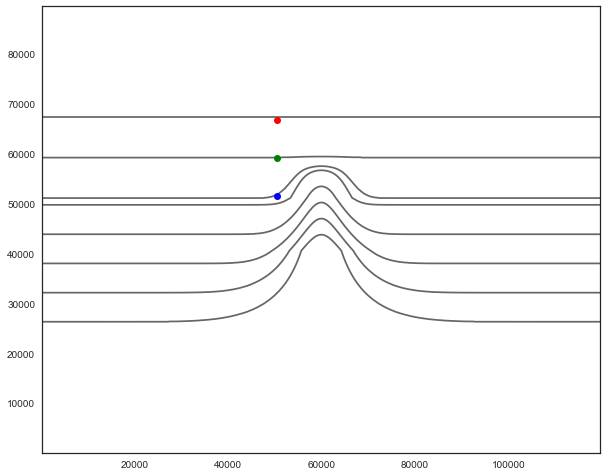

In [5]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.contour(grid.X,grid.Y,grid.Depth,[50,100,150,200,400,600,800,1000], colors='0.4')
ax.plot(grid.X[120],grid.Y[227], 'bo')
ax.plot(grid.X[120],grid.Y[267], 'go')
ax.plot(grid.X[120],grid.Y[297], 'ro')

In [6]:
advCS1_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X')
advCS2_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X')
advCS3_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X')
advCS4_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X')
advCS5_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X')

difCS1_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X')
difCS2_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X')
difCS3_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X')
difCS4_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X')
difCS5_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X')


### Total cross-shelf

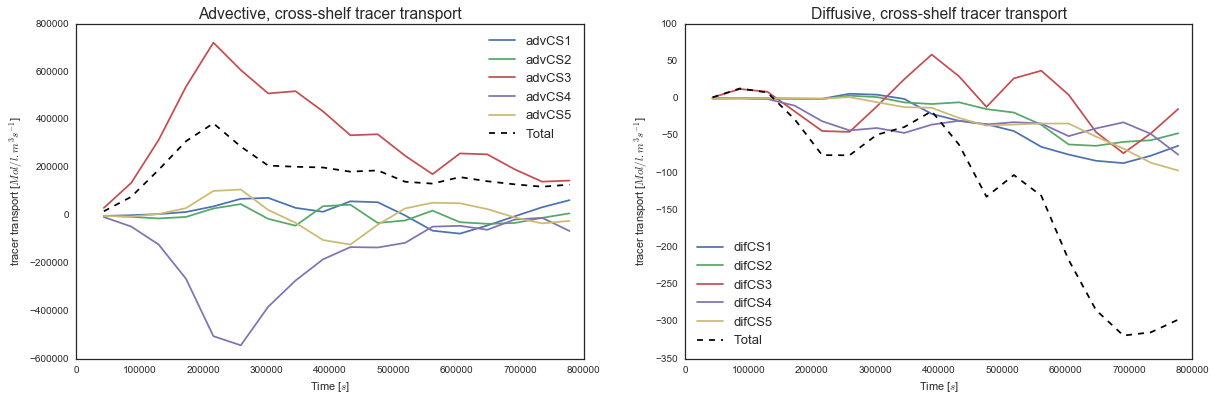

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1')
(advCS2_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2')
(advCS3_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3')
(advCS4_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4')
(advCS5_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5') 

(advCS1_flux+
 advCS2_flux+
 advCS3_flux+
 advCS4_flux+
 advCS5_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1')
(difCS2_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2')
(difCS3_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3')
(difCS4_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4')
(difCS5_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5') 

(difCS1_flux+
 difCS2_flux+
 difCS3_flux+
 difCS4_flux+
 difCS5_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport')

### Below 100 m

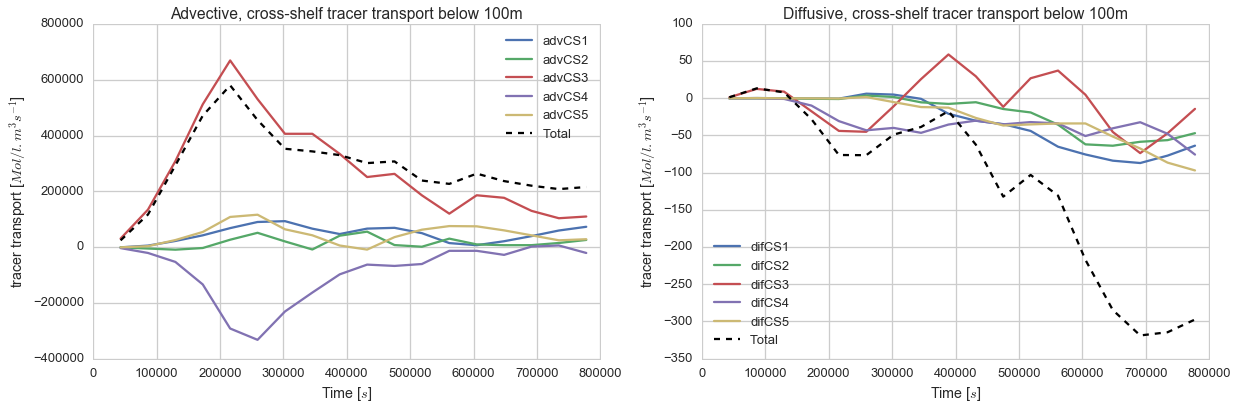

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1')
(advCS2_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2')
(advCS3_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3')
(advCS4_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4')
(advCS5_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5') 

(advCS1_flux+
 advCS2_flux+
 advCS3_flux+
 advCS4_flux+
 advCS5_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1')
(difCS2_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2')
(difCS3_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3')
(difCS4_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4')
(difCS5_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5') 

(difCS1_flux+
 difCS2_flux+
 difCS3_flux+
 difCS4_flux+
 difCS5_flux).isel(Zmd000090=slice(20,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport below 100m')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport below 100m')




### Above 100 m

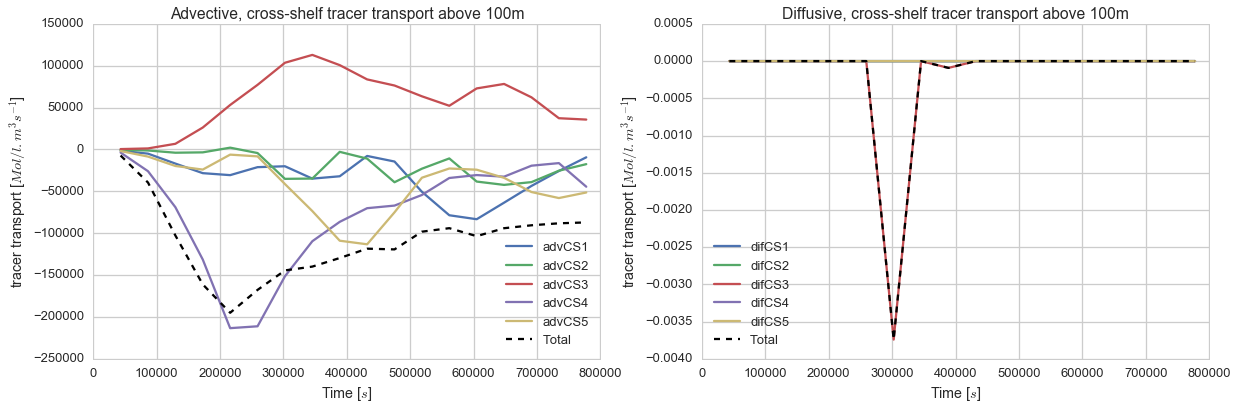

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1')
(advCS2_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2')
(advCS3_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3')
(advCS4_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4')
(advCS5_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5') 

(advCS1_flux+
 advCS2_flux+
 advCS3_flux+
 advCS4_flux+
 advCS5_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1')
(difCS2_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2')
(difCS3_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3')
(difCS4_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4')
(difCS5_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5') 

(difCS1_flux+
 difCS2_flux+
 difCS3_flux+
 difCS4_flux+
 difCS5_flux).isel(Zmd000090=slice(0,20)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport above 100m')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport above 100m')



### Below shelf-break depth

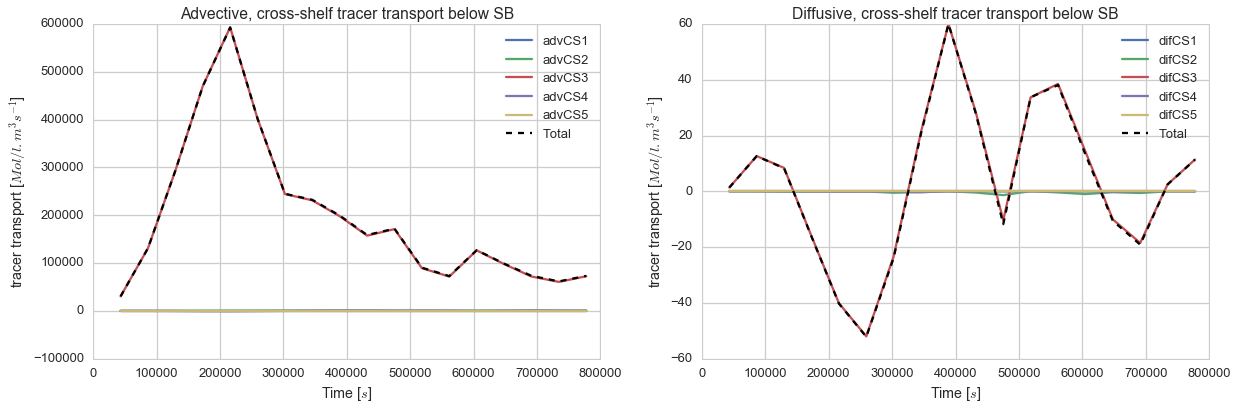

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1')
(advCS2_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2')
(advCS3_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3')
(advCS4_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4')
(advCS5_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5') 

(advCS1_flux+
 advCS2_flux+
 advCS3_flux+
 advCS4_flux+
 advCS5_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1')
(difCS2_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2')
(difCS3_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3')
(difCS4_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4')
(difCS5_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5') 

(difCS1_flux+
 difCS2_flux+
 difCS3_flux+
 difCS4_flux+
 difCS5_flux).isel(Zmd000090=slice(30,90)).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport below SB')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport below SB')



### How much tracer goes beyond 100 m?

In [11]:
advCS1b_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS1_x_slice, CS1b_y_ind, 'X')
advCS2b_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS2_x_slice, CS1b_y_ind, 'X')
advCS3b_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS3_x_slice, CS1b_y_ind, 'X')
advCS4b_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS4_x_slice, CS1b_y_ind, 'X')
advCS5b_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS5_x_slice, CS1b_y_ind, 'X')

difCS1b_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS1_x_slice, CS1b_y_ind, 'X')
difCS2b_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS2_x_slice, CS1b_y_ind, 'X')
difCS3b_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS3_x_slice, CS1b_y_ind, 'X')
difCS4b_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS4_x_slice, CS1b_y_ind, 'X')
difCS5b_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS5_x_slice, CS1b_y_ind, 'X')



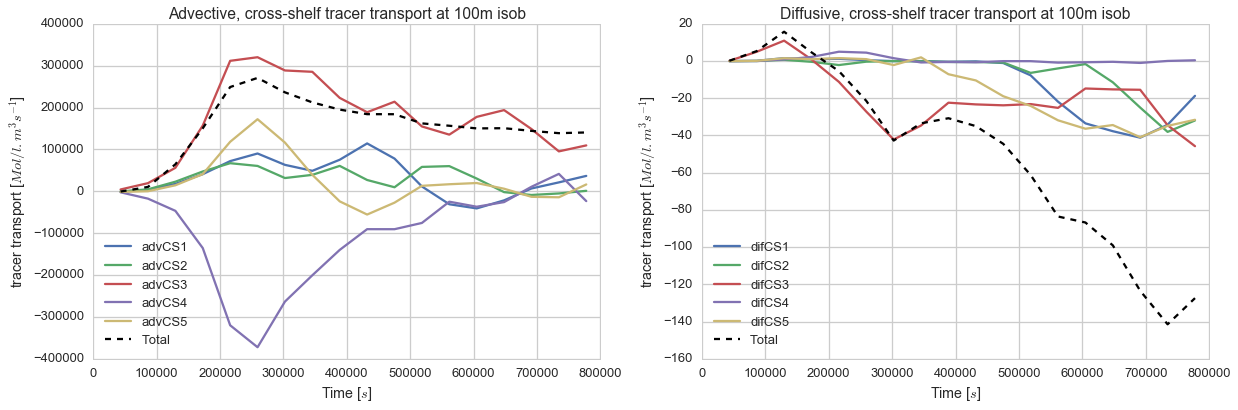

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1')
(advCS2b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2')
(advCS3b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3')
(advCS4b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4')
(advCS5b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5') 

(advCS1b_flux+
 advCS2b_flux+
 advCS3b_flux+
 advCS4b_flux+
 advCS5b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1')
(difCS2b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2')
(difCS3b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3')
(difCS4b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4')
(difCS5b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5') 

(difCS1b_flux+
 difCS2b_flux+
 difCS3b_flux+
 difCS4b_flux+
 difCS5b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport at 100m isob')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport at 100m isob')


### How much tracer goes beyond 50 m?

In [13]:
advCS1c_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS1_x_slice, CS1c_y_ind, 'X')
advCS2c_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS2_x_slice, CS1c_y_ind, 'X')
advCS3c_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS3_x_slice, CS1c_y_ind, 'X')
advCS4c_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS4_x_slice, CS1c_y_ind, 'X')
advCS5c_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS5_x_slice, CS1c_y_ind, 'X')

difCS1c_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS1_x_slice, CS1c_y_ind, 'X')
difCS2c_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS2_x_slice, CS1c_y_ind, 'X')
difCS3c_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS3_x_slice, CS1c_y_ind, 'X')
difCS4c_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS4_x_slice, CS1c_y_ind, 'X')
difCS5c_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS5_x_slice, CS1c_y_ind, 'X')


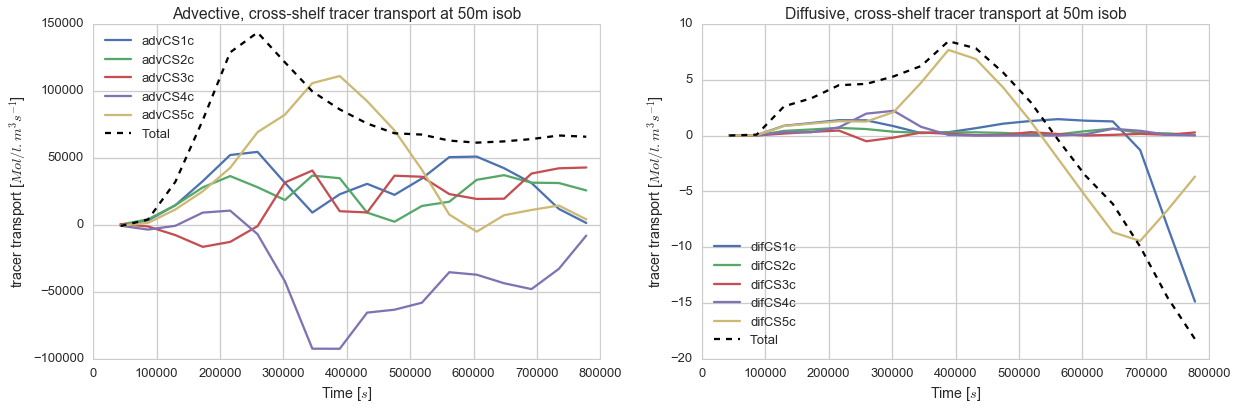

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1c')
(advCS2c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2c')
(advCS3c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3c')
(advCS4c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4c')
(advCS5c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5c') 

(advCS1c_flux+
 advCS2c_flux+
 advCS3c_flux+
 advCS4c_flux+
 advCS5c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1c')
(difCS2c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2c')
(difCS3c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3c')
(difCS4c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4c')
(difCS5c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5c') 

(difCS1c_flux+
 difCS2c_flux+
 difCS3c_flux+
 difCS4c_flux+
 difCS5c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport at 50m isob')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport at 50m isob')


### How much tracer enters/exits the domain thorugh the N boundary?

In [15]:
advCS1d_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS1_x_slice, CS1d_y_ind, 'X')
advCS2d_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS2_x_slice, CS1d_y_ind, 'X')
advCS3d_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS3_x_slice, CS1d_y_ind, 'X')
advCS4d_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS4_x_slice, CS1d_y_ind, 'X')
advCS5d_flux = calc_trac_transport_CS(unstagger_xarray(flux.ADVyTr01,'Yp1'), CS5_x_slice, CS1d_y_ind, 'X')

difCS1d_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS1_x_slice, CS1d_y_ind, 'X')
difCS2d_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS2_x_slice, CS1d_y_ind, 'X')
difCS3d_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS3_x_slice, CS1d_y_ind, 'X')
difCS4d_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS4_x_slice, CS1d_y_ind, 'X')
difCS5d_flux = calc_trac_transport_CS(unstagger_xarray(flux.DFyETr01,'Yp1'), CS5_x_slice, CS1d_y_ind, 'X')


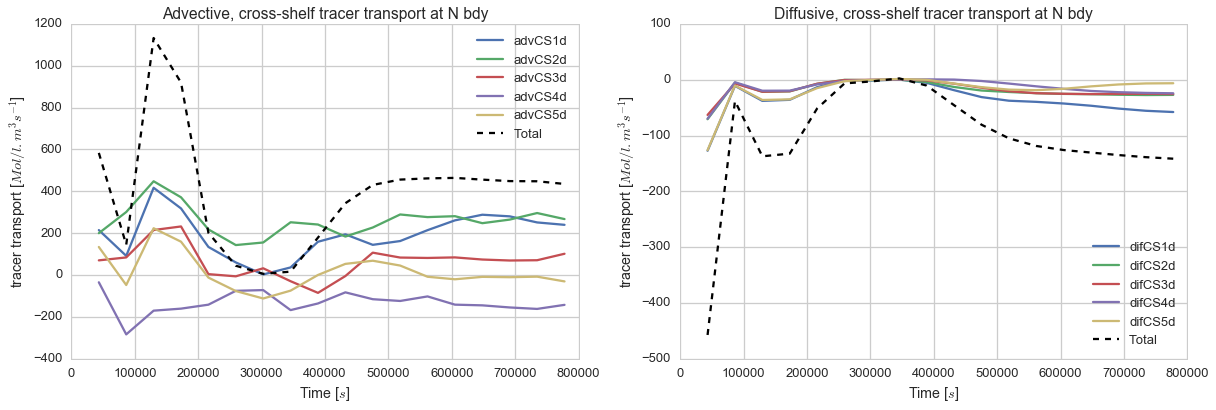

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS1d')
(advCS2d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS2d')
(advCS3d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS3d')
(advCS4d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS4d')
(advCS5d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advCS5d') 

(advCS1d_flux+
 advCS2d_flux+
 advCS3d_flux+
 advCS4d_flux+
 advCS5d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difCS1d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS1d')
(difCS2d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS2d')
(difCS3d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS3d')
(difCS4d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS4d')
(difCS5d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difCS5d') 

(difCS1d_flux+
 difCS2d_flux+
 difCS3d_flux+
 difCS4d_flux+
 difCS5d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport at N bdy')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport at N bdy')


## Alongshore transports

### Upstream shelf

In [17]:
advAS1_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1_x_ind, AS1_y_slice, 'Y')
advAS2_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1_x_ind, AS2_y_slice, 'Y')
advAS3_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1_x_ind, AS3_y_slice, 'Y')

difAS1_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1_x_ind, AS1_y_slice, 'Y')
difAS2_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1_x_ind, AS2_y_slice, 'Y')
difAS3_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1_x_ind, AS3_y_slice, 'Y')


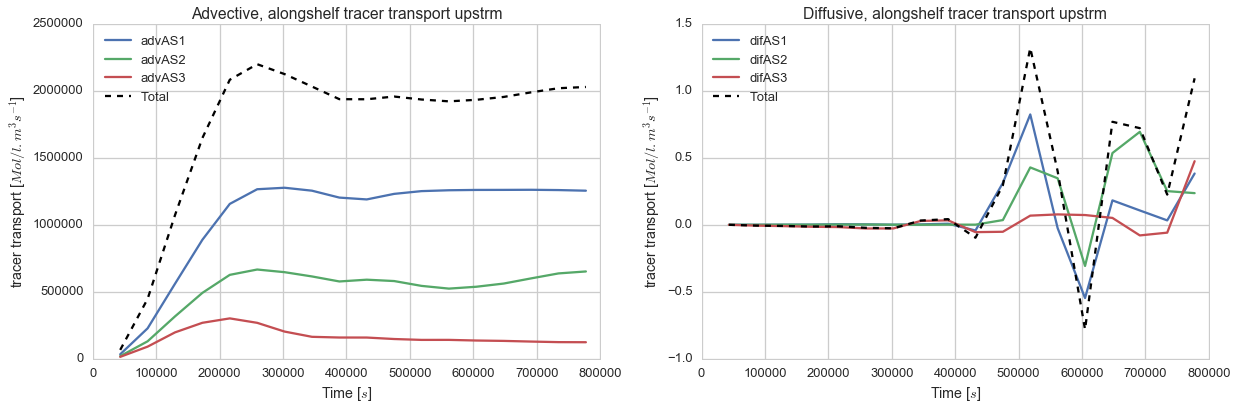

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1')
(advAS2_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2')
(advAS3_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3')

(advAS1_flux+
 advAS2_flux+
 advAS3_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difAS1_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1')
(difAS2_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2')
(difAS3_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3')

(difAS1_flux+
 difAS2_flux+
 difAS3_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport upstrm')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport upstrm')

### Upstream, near canyon rim

In [19]:
advAS1b_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1b_x_ind, AS1_y_slice, 'Y')
advAS2b_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1b_x_ind, AS2_y_slice, 'Y')
advAS3b_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1b_x_ind, AS3_y_slice, 'Y')

difAS1b_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1b_x_ind, AS1_y_slice, 'Y')
difAS2b_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1b_x_ind, AS2_y_slice, 'Y')
difAS3b_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1b_x_ind, AS3_y_slice, 'Y')


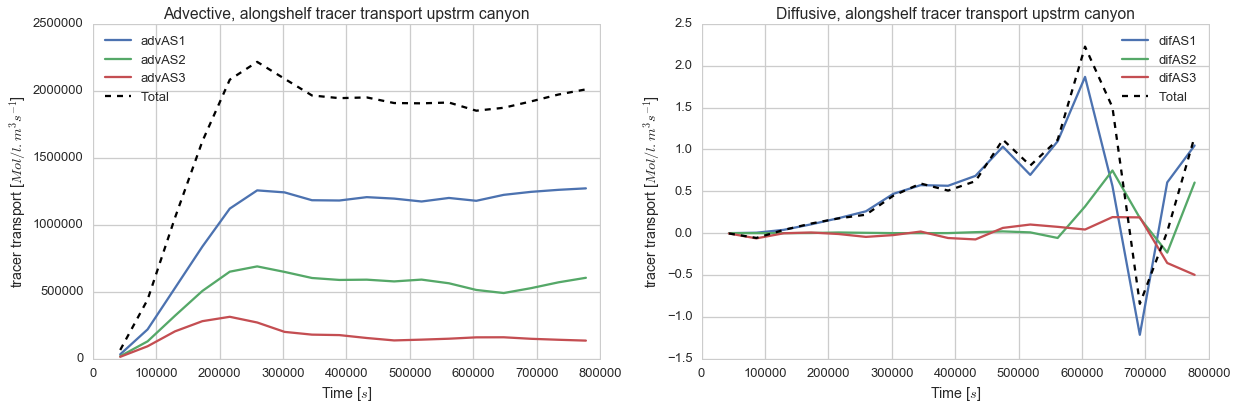

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1')
(advAS2b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2')
(advAS3b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3')

(advAS1b_flux+
 advAS2b_flux+
 advAS3b_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difAS1b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1')
(difAS2b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2')
(difAS3b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3')

(difAS1b_flux+
 difAS2b_flux+
 difAS3b_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport upstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport upstrm canyon')


### Downstream, near canyon rim

In [21]:
advAS1c_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


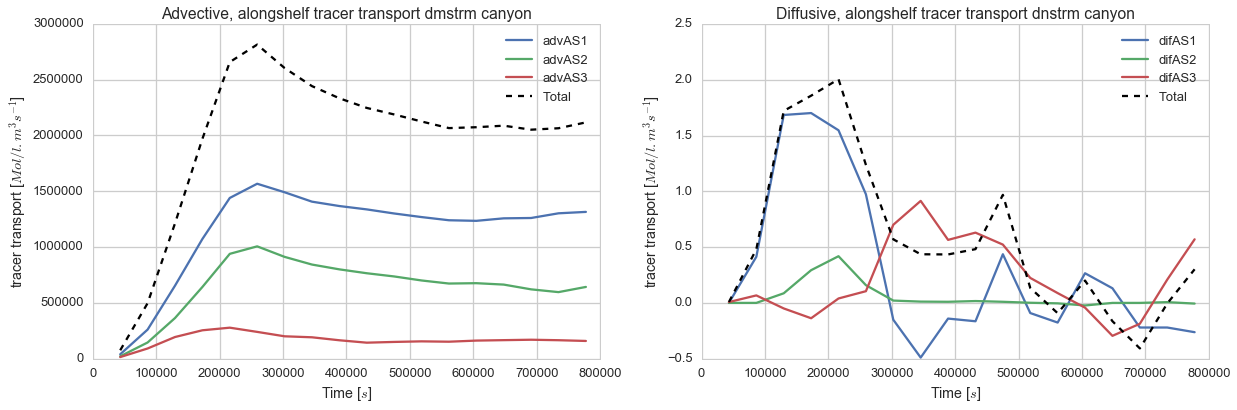

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1')
(advAS2c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2')
(advAS3c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3')

(advAS1c_flux+
 advAS2c_flux+
 advAS3c_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difAS1c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1')
(difAS2c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2')
(difAS3c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3')

(difAS1c_flux+
 difAS2c_flux+
 difAS3c_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

### Downstream shelf

In [23]:
advAS1d_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1d_x_ind, AS1_y_slice, 'Y')
advAS2d_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1d_x_ind, AS2_y_slice, 'Y')
advAS3d_flux = calc_trac_transport_AS(unstagger_xarray(flux.ADVxTr01,'Xp1'), AS1d_x_ind, AS3_y_slice, 'Y')

difAS1d_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1d_x_ind, AS1_y_slice, 'Y')
difAS2d_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1d_x_ind, AS2_y_slice, 'Y')
difAS3d_flux = calc_trac_transport_AS(unstagger_xarray(flux.DFxETr01,'Xp1'), AS1d_x_ind, AS3_y_slice, 'Y')


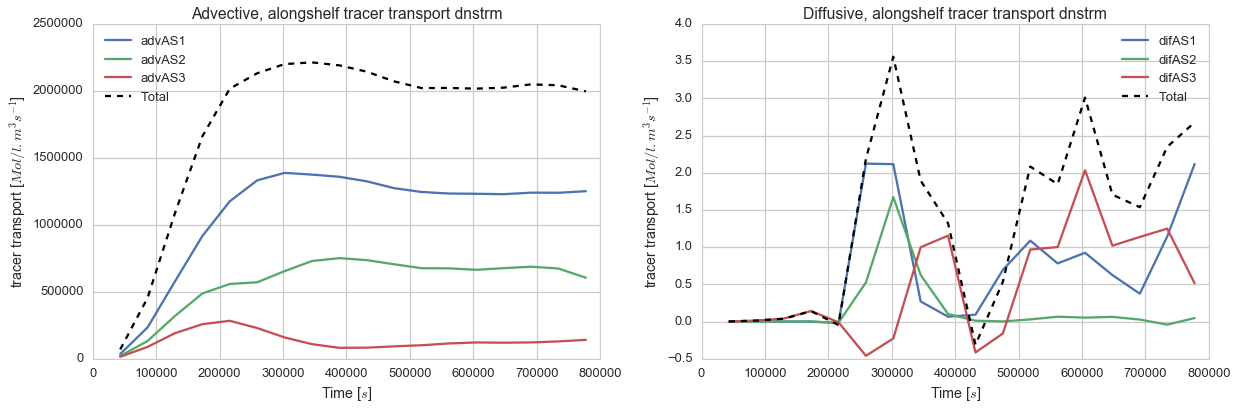

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1')
(advAS2d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2')
(advAS3d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3')

(advAS1d_flux+
 advAS2d_flux+
 advAS3d_flux).sum(dim='Zmd000090').plot(ax=ax[0], label = 'Total', color='k',linestyle='--')

(difAS1d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1')
(difAS2d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2')
(difAS3d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3')

(difAS1d_flux+
 difAS2d_flux+
 difAS3d_flux).sum(dim='Zmd000090').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dnstrm')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm')

### Vertical transport at shelf break depth (only within the canyon)


In [25]:
advVR1_flux = (unstagger_xarray(flux.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux = (unstagger_xarray(flux.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux = (unstagger_xarray(flux.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')


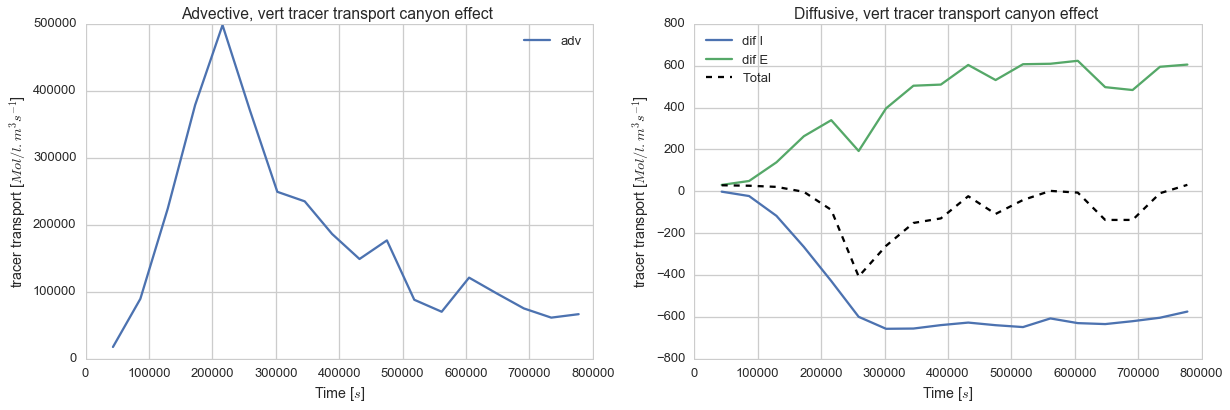

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advVR1_flux).sum(dim='Y').plot(ax=ax[0], label = 'adv')


(difIVR1_flux).sum(dim='Y').plot(ax=ax[1], label = 'dif I')
(difEVR1_flux).sum(dim='Y').plot(ax=ax[1], label = 'dif E')

(difIVR1_flux+
 difEVR1_flux).sum(dim='Y').plot(ax=ax[1], label = 'Total', color='k',linestyle='--')

ax[0] = fig_looks(ax[0],title='Advective, vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[1],title='Diffusive, vert tracer transport canyon effect ')